In [16]:
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import cv2

In [ ]:
# Download some images containing people
!wget 'https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg'

In [9]:
image = cv2.imread('images/banner-diverse-group-of-people-2.jpg')

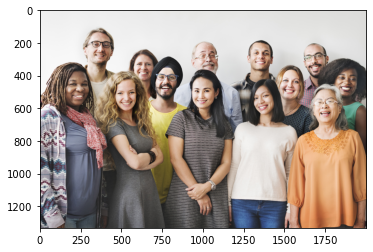

In [10]:
plt.imshow(image[:,:,::-1])

In [11]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [12]:
r,w = hog.detectMultiScale(image,winStride=(1,1), padding=(1,1), scale=1.2)

In [13]:
r

array([[1168,  382,  181,  364],
       [1246,  381,  191,  382],
       [ 467,  115,  330,  660],
       [1342,  252,  396,  793],
       [1472,  664,  112,  224],
       [ 996,  169,  111,  221],
       [ 377,  184,   77,  154],
       [1762,  822,   77,  154]], dtype=int32)

In [17]:
rects = np.array([(x, y, x+w, y+r) for (x, y, w, r) in r])
rects

array([[1168,  382, 1349,  746],
       [1246,  381, 1437,  763],
       [ 467,  115,  797,  775],
       [1342,  252, 1738, 1045],
       [1472,  664, 1584,  888],
       [ 996,  169, 1107,  390],
       [ 377,  184,  454,  338],
       [1762,  822, 1839,  976]], dtype=int32)

In [18]:
# Perform Non-max suppression
rects_NMS = non_max_suppression(rects, probs=None, overlapThresh=.2)
rects_NMS

array([[1342,  252, 1738, 1045],
       [1762,  822, 1839,  976],
       [ 467,  115,  797,  775],
       [1168,  382, 1349,  746],
       [ 996,  169, 1107,  390],
       [ 377,  184,  454,  338]])

In [19]:
for  (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,255), 3)

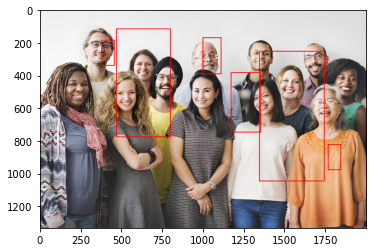

In [20]:
plt.imshow(image[:,:,::-1])

In [21]:
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression
import numpy as np

In [22]:
# Lets try doing this again using a completely different image
# Download new image
!wget 'https://www.finra.org/sites/default/files/Fin_Pro_0.png'

--2022-01-30 23:18:12--  https://www.finra.org/sites/default/files/Fin_Pro_0.png
Resolving www.finra.org (www.finra.org)... 104.18.0.70, 104.18.1.70
Connecting to www.finra.org (www.finra.org)|104.18.0.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585153 (571K) [image/png]
Saving to: ‘Fin_Pro_0.png.1’

Fin_Pro_0.png.1     100%[===================>] 571.44K   615KB/s    in 0.9s    

2022-01-30 23:18:14 (615 KB/s) - ‘Fin_Pro_0.png.1’ saved [585153/585153]



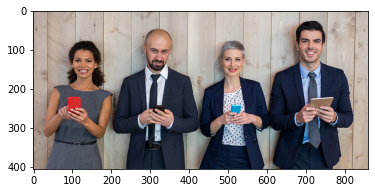

In [23]:
img = cv2.imread('images/Fin_Pro_0.png')
plt.imshow(img[:,:,::-1])

In [24]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [25]:
r,c = hog.detectMultiScale(img, padding=(1,1), winStride=(1,1), scale=1.2)

In [26]:
r

array([[ 74,  63,  77, 154],
       [393, 158,  69, 138],
       [629, 174,  77, 154]], dtype=int32)

In [27]:
rect = np.array([(x1,y1,x2+c,y2+r) for (x,y,r,c) in  r])

rects_NMS = non_max_suppression(rect, probs=None, overlapThresh=0.4)

In [28]:
for (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255),2)

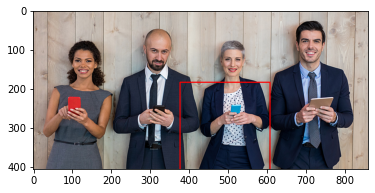

In [29]:
plt.imshow(img[:,:,::-1])

These outputs were horrible! 😮‍💨

## Face Detection (YOLO Detector)

In [30]:
! pip3 install cvlib

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cvlib
from cvlib.object_detection import draw_bbox

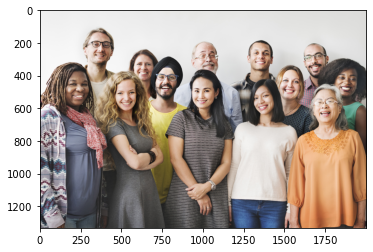

In [32]:
image = cv2.imread('images/banner-diverse-group-of-people-2.jpg')
image = image[:,:,::-1]
plt.imshow(image)

In [34]:
# Detetect faces in the image
bbox, conf = cvlib.detect_face(image)

bbox

[[924, 423, 1070, 605],
 [148, 375, 298, 583],
 [282, 145, 432, 333],
 [701, 344, 838, 529],
 [1308, 461, 1425, 635],
 [459, 428, 598, 624],
 [1283, 202, 1416, 374],
 [1459, 365, 1599, 549],
 [574, 273, 683, 426],
 [1629, 241, 1749, 407]]

In [35]:
conf

[0.9967963,
 0.9922845,
 0.98974,
 0.985159,
 0.97574687,
 0.9745241,
 0.9600945,
 0.9160227,
 0.7460307,
 0.5992773]

In [36]:
labels = []
for i in range(len(conf)):
    labels.append('person')

In [42]:
image2 = draw_bbox(image[:,:,::-1], bbox, labels, conf, write_conf=True, colors=(255,0,0))

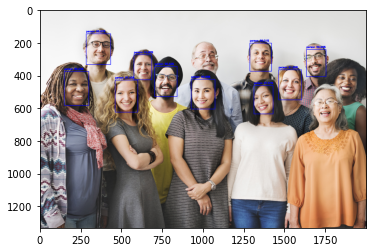

In [43]:
plt.imshow(image2[:,:,::-1])

In [44]:
from cvlib.object_detection import draw_bbox
import cvlib

In [48]:
image = cv2.imread('images/me.jpg')
box, conf = cvlib.detect_face(image)

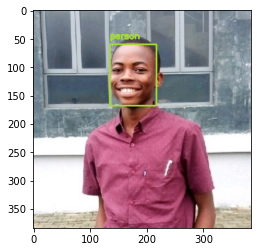

In [49]:
plt.imshow(draw_bbox(image,box,['person'], conf)[:,:,::-1])

In [ ]:
!pip3 install opencv-python==4.5.3.56

In [51]:
bbox, conf = cvlib.detect_face(image)

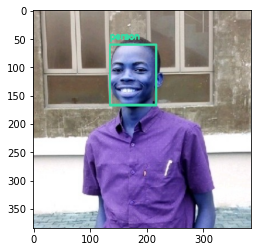

In [52]:
plt.imshow(draw_bbox(image,bbox, ['person'], conf))

## Object Tracking in Videos

In [53]:
import cv2
import matplotlib.pyplot as plt

In [54]:
trackers = {
    # 'csrt': cv2.TrackerCSRT_create,
    # 'kcf': cv2.TrackerKCF_create,
    # 'boosting': cv2.TrackerBoosting_create,
    'mil':  cv2.TrackerMIL_create,
    # 'tld': cv2.TrackerTLD_create,
    # 'medianflow': cv2.TrackerMedianFlow_create,
    # 'mosse': cv2.TrackerMOSSE_create
}

In [55]:
tracker = trackers['mil']()

In [56]:
video = cv2.VideoCapture('football.mp4')
ret, frame = video.read()

In [ ]:
cv2.imshow('frame',frame)
bb = cv2.selectROI('frame',frame)
tracker.init(frame, bb)

In [ ]:
while True:
    ret, frame = video.read()
    if not ret:
        break
    (success, box) = tracker.update(frame)
    if success:
        (x,y,w,h) = [int(i) for i in box]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
    cv2.imshow('frame', frame)
    key = cv2.waitKey(5) & 0xFF
    if key == ord('q'):
        break
    video.release()
    cv2.destroyAllWindows()    

In [15]:
# rename images 
import os
idx = 0
for i in os.listdir('my_photo_4_yolo'):
    os.rename('my_photo_4_yolo/'+i,str(idx)+'.jpg')
    idx+=1